# DATA ANALYSIS OF EDUCATIONAL MANAGEMENT SYSTEMS

Exploratory Data Analysis (EDA) of a data set provided by the Word Bank. 
The World Bank EdStats (Education Statistics) portal is a comprehensive data and analysis source for key topics in education.
The main target of this study is to process these data in order to give business guidance to expand internationnaly our online training
programs company.

In [1]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                # numerical data processing
import pandas as pd               # numerical tables & time series
import scipy as sp                # numerical integration, interpolation, optimization, linear algebra, and statistics
import scipy.stats as st          # statistical functions
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # static, animated, and interactive visualizations in Python


In [2]:
# Transforming input files.csv to dataframes

df_data = pd.read_csv("EdStatsData.csv")
df_footnote = pd.read_csv("EdStatsFootNote.csv")
df_country = pd.read_csv("EdStatsCountry.csv")
df_series = pd.read_csv("EdStatsSeries.csv")
df_countryseries = pd.read_csv("EdStatsCountry-Series.csv")


__OVERVIEW OF THE DIFFERENT INPUT FILES__


In [3]:
df_data.head(2)

# Data numbers for all indicators/region/country

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_footnote.head(2)

# Description of where the data come from

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [5]:
df_country.head(2)

# Countries economical description

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [6]:
df_series.head(2)

# Details description of indicators

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_countryseries.head(2)

# Country codes and data sources

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


__FEW FONCTIONS DEFINED TO HELP DESCRIBING THE CHARACTERISTICS OF THE INPUT FILES__

In [8]:
def duplicates (data):
    """Calculate the number of duplicates in dataframe data"""
    
    return len(data)-len(data.drop_duplicates())


def missing_cells (data):
    """Calculate the number of empty cells in dataframe data"""
    
    return data.isna().sum().sum()


def missing_cells_percent (data):
    """Calculate the percentage of empty cells in dataframe data""" 
    
    return missing_cells(data)/(data.size)*100
    

def filled_cells (data):
    """Calculate the number of existing values in dataframe data"""
    
    return data.notna().sum()  
    

def filled_cells_percent (data):
    """Calculate the percentage of existing values in dataframe data"""
    
    return filled_cells(data)/(len(data.index))*100


__CREATION OF A DATAFRAME SUMMARIZING KEY INFO FROM THE INPUT FILES__


In [9]:
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

list_files = ['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv', 'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']
files_spec = {'Total rows' : pd.Series([len(df_data), len(df_footnote), len(df_country), len(df_series),
                                        len(df_countryseries)],
                        index = list_files),
              'Total columns' : pd.Series([len(df_data.columns), len(df_footnote.columns), len(df_country.columns),
                                           len(df_series.columns), len(df_countryseries.columns)],
                        index = list_files),
              'Total duplicates' : pd.Series([duplicates(df_data), duplicates(df_footnote), duplicates(df_country),
                                              duplicates(df_series), duplicates(df_countryseries)],
                        index = list_files),
              'Total Missing cells ' : pd.Series([missing_cells(df_data), missing_cells(df_footnote), missing_cells(df_country),
                                                  missing_cells(df_series), missing_cells(df_countryseries)],
                        index = list_files),
              'Missing cells (%)' : pd.Series([missing_cells_percent(df_data), missing_cells_percent(df_footnote), 
                                               missing_cells_percent(df_country), missing_cells_percent(df_series),
                                               missing_cells_percent(df_countryseries)],
                        index = list_files)}

# Creates Dataframe df_files_spec

df_files_spec = pd.DataFrame(files_spec)
index = df_files_spec.index
index. name = "Input File Name"
round(df_files_spec, 2)


,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
EdStatsData.csv,886930,70,0,53455179,86.10
EdStatsFootNote.csv,643638,5,0,643638,20.00
EdStatsCountry.csv,241,32,0,2354,30.52
EdStatsSeries.csv,3665,21,0,55203,71.72
EdStatsCountry-Series.csv,613,4,0,613,25.00


__DETAILED INSPECTION OF THE LAST COLUMN "Unnamed" IN EACH FILE__


In [10]:
unnamed_col = {'Column Name' : pd.Series(['Unnamed: 69', 'Unnamed: 4', 'Unnamed: 31', 'Unnamed: 20', 'Unnamed: 3'],
                                    index = list_files),
               'Existing Data' : pd.Series([filled_cells(df_data['Unnamed: 69']), filled_cells(df_footnote['Unnamed: 4']),
                                            filled_cells(df_country['Unnamed: 31']), filled_cells(df_series['Unnamed: 20']),
                                            filled_cells(df_countryseries['Unnamed: 3'])], 
                                    index = list_files)}
                               
df_unnamed_col = pd.DataFrame(unnamed_col)
index = df_unnamed_col.index
index. name = "Input File Name"
df_unnamed_col


,Column Name,Existing Data
Input File Name,,
EdStatsData.csv,Unnamed: 69,0
EdStatsFootNote.csv,Unnamed: 4,0
EdStatsCountry.csv,Unnamed: 31,0
EdStatsSeries.csv,Unnamed: 20,0
EdStatsCountry-Series.csv,Unnamed: 3,0


__LAST COLUMN "Unnamed" DELETED IN EACH FILE (NO DATA)__


In [11]:
df_data = df_data.drop(['Unnamed: 69'], axis=1)
df_footnote = df_footnote.drop(['Unnamed: 4'], axis=1)
df_country = df_country.drop(['Unnamed: 31'], axis=1)
df_series = df_series.drop(['Unnamed: 20'], axis=1)
df_countryseries = df_countryseries.drop(['Unnamed: 3'], axis=1)


__OVERVIEW OF THE LABEL "Country Name" & ITS ASSOCIATED LABEL "Country Code" FROM df_data__


In [12]:
cols = [col for col in df_data.columns if col in ['Country Name', 'Country Code']]
df2 = df_data[cols]
df3 = df2.drop_duplicates()
df3.index = np.arange(1, len(df3)+1)
df3


,Country Name,Country Code
1,Arab World,ARB
2,East Asia & Pacific,EAS
3,East Asia & Pacific (excluding high income),EAP
4,Euro area,EMU
5,Europe & Central Asia,ECS
...,...,...
238,Virgin Islands (U.S.),VIR
239,West Bank and Gaza,PSE
240,"Yemen, Rep.",YEM
241,Zambia,ZMB


__WORLD REGIONS SEPARATION FROM INDIVIDUAL COUNTRIES & NON-GEOGRAPHIC CATEGORIES from df_data__


Among these 242 different labels 'Country Code', few describe whole regions or income based areas. 
The remaining 'Country Code' represent individual countries.

In [13]:
# List of pertinent regions ("Country Code based")

list_regions = ['EUU', 'NAC', 'SAS', 'LCN', 'ARB', 'SSF', 'MEA', 'EAS', 'ECS']
df_regions = df_data[df_data['Country Code'].isin(list_regions)] 

# List of non-geographic regions ("Country Code" based)

list_non_country = (['EMU', 'HPC', 'HIC', 'LMY', 'LDC', 'LIC', 'LMC', 'MIC',
                    'OED', 'UMC', 'WLD', 'ECA', 'LAC', 'EAP', 'SSA', 'MNA'])
df_non_country = df_data[df_data['Country Code'].isin(list_non_country)]

# List of individual countries by exclusion

list_country_left = list_regions + list_non_country
df_countries = df_data[~df_data['Country Code'].isin(list_country_left)]


__OVERVIEW OF THE NUMBER OF "Country Name" IN THE RESULTING DATAFRAMES__

In [14]:
list_subfiles = ['df_regions', 'df_non_country', 'df_countries']
subfiles_spec = {'Unique Country Name' : pd.Series([df_regions['Country Name'].nunique(), 
                                                    df_non_country['Country Name'].nunique(),
                                                    df_countries['Country Name'].nunique()],
                                         index = list_subfiles)}

# Creates Dataframe df_subfiles_spec

df_subfiles_spec = pd.DataFrame(subfiles_spec)
index = df_subfiles_spec.index
index. name = "Resulting dataframes"
df_subfiles_spec


,Unique Country Name
Resulting dataframes,
df_regions,9
df_non_country,16
df_countries,217


We obtain 3 subdataframes with:
<br> -  df_regions containing 9 geographic regions
<br> -  df_non_country containing 16 non geographic regions
<br> -  df_countries containing 217 individual countries.

__INTERNET YEARS - TIMEFRAME RESTRICTION YEARS+2000 TIL DATE OF STUDY 2016__

In [15]:
# df_Subcountry1: All data within 2000 to 2016

df_subcountry = df_countries.drop(df_countries.loc[:, '1970':'1999'].columns, axis = 1)
df_subcountry = df_subcountry.drop(df_subcountry.loc[:, '2016':'2100'].columns, axis = 1)


__DATA CLEANING: 1st PHASE - CHOICE BY EXCLUSION: INDICATORS SEMANTIC ANALYSIS__

We have 3665 unique indicators and want to go down to a few pertinent ones. 
<br> We eliminate all indicators that contain the following keywords (not pertinent with the business goals).

In [16]:
non_keywords = ['EGRA', 'Adult', 'adult', 'Elderly', 'Male', 'male', 'Inbound', 'inbound', 'outbound', 'literacy', 'Out', 
              'primary', 'Primary', 'Gini', 'ISCED ', 'Wittgenstein','PIRLS', 'Official', 'Mortality', 'Africa', 'repeaters',
              'Repetition', 'Average', 'Score','lower secondary', 'HIV', 'childhood','PISA', 'MICS', 'TIMSS', 'DHS', 'SACMEQ',
              'PASEC', 'LLECE', 'SABER', 'salaries', 'compulsory', 'gender', 'Gender', 'GDP', 'GNI', 'total']

df_country_non_keywords = df_subcountry[~df_subcountry['Indicator Name'].str.contains('|'.join(non_keywords))]
len(df_country_non_keywords['Indicator Name'].unique())
#df_country_non_keywords.to_csv('nonkeywords.csv')

191

This exclusion by keywords make the number of indicators drop from 3665 to 191.

__DATA CLEANING: 2nd PHASE - CHOICE BY EXCLUSION: AVAILABILITY OF INDICATORS__

We eliminate all indicators data that are not - at least - 60% available over the 2000-2016 period by applying a filter.

In [17]:
Filter = 0.6
limitPer = len(df_country_non_keywords.columns) * Filter
df_subcountry1 = df_country_non_keywords.dropna(thresh=limitPer, axis=0)
len(df_subcountry1['Indicator Name'].unique())

111

This 2nd phase of exclusion makes the number of indicators to drop from 191 down to 111.

__DATA CLEANING: 3rd PHASE - CHOICE BY INCLUSION__


Among these 136 remaining indicators, we hand pick few that seem pertinent to our problematic.

In [18]:
Indicators=[ 'IT.NET.USER.P2', 'SP.POP.GROW', 'UIS.ROFST.3.CP', 'SE.SEC.ENRR', 'SE.SEC.ENRR.UP', 'SE.TER.ENRR']

df_country_indicators = df_subcountry1[df_subcountry1['Indicator Code'].isin(Indicators)]
df_country_indicators.head(6)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,13.048740,NaN,13.317080,18.664789,19.783701,29.930460,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409
92968,Afghanistan,AFG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,12.217280,NaN,7.975800,11.444510,12.105560,16.968100,17.555300,21.803459,26.050900,32.134010,39.862740,44.565182,46.262440,43.905590,42.613129
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,3.494659,4.251504,4.720528,4.818041,4.468918,3.870470,3.228630,2.755225,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234
96625,Albania,ALB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,71.452797,72.905159,73.002861,75.018990,74.170280,76.887062,77.955887,81.280869,83.648918,85.409309,88.411636,90.848351,92.741470,95.831573,96.426086,95.765488
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,15.603730,15.974960,16.431709,16.805559,20.055540,23.311100,26.620440,30.653669,32.077801,33.400749,44.540649,49.670399,58.565491,62.547760,62.706848,58.109951


__MERGE INFO 'Region' FROM 'df_Country' WITH 'df_Data'__ 

To relate the different countries with their corresponding region, we import the 'Region' column from dataframe df_country into a new dataframe where all useful information are gathered.

In [19]:
# We create a subdataframe by extracting the columns Country Code & Region from dataframe df_country

col_list = ['Country Code', 'Region']
df_countrysubset = df_country[col_list]

# We then merge this subdataframe with df_country_indicators

df_indic_combined = pd.merge(df_country_indicators, df_countrysubset) 

# We replace the column 'Region' from the end of the dataframe to a more readable position

column_to_move = df_indic_combined.pop("Region")
df_indic_combined.insert(2, "Region", column_to_move)
df_indic_combined.to_csv('Combined.csv')
round(df_indic_combined.head(6)) 


,Country Name,Country Code,Region,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,13.0,NaN,13.0,19.0,...,30.0,30.0,40.0,47.0,53.0,55.0,57.0,57.0,56.0,56.0
1,Afghanistan,AFG,South Asia,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,12.0,NaN,8.0,11.0,...,17.0,18.0,22.0,26.0,32.0,40.0,45.0,46.0,44.0,43.0
2,Afghanistan,AFG,South Asia,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,4.0,4.0,5.0,5.0,6.0,7.0,8.0
3,Afghanistan,AFG,South Asia,Population growth (annual %),SP.POP.GROW,3.0,4.0,5.0,5.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,Albania,ALB,Europe & Central Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,71.0,73.0,73.0,75.0,74.0,...,78.0,81.0,84.0,85.0,88.0,91.0,93.0,96.0,96.0,96.0
5,Albania,ALB,Europe & Central Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,16.0,16.0,16.0,17.0,20.0,...,27.0,31.0,32.0,33.0,45.0,50.0,59.0,63.0,63.0,58.0


**DISPLAY OF THE PERTINENT INDICATORS**

We generate a dataframe that lists the chosen indicators and their meaning.

In [20]:
series_indic = df_series[df_series['Series Code'].isin(Indicators)]

list_indicators = pd.DataFrame(columns=['Series Code', 'Long definition', 'Topic'])

for indic in series_indic.iterrows():
   
        list_indicators = list_indicators.append(pd.DataFrame([[indic[1]['Series Code'], indic[1]['Long definition'], indic[1]['Topic']]],
                                                              columns=['Series Code','Long definition', 'Topic']))
        list_indicators.index = np.arange(1, len(list_indicators)+1)
list_indicators

,Series Code,Long definition,Topic
1,IT.NET.USER.P2,Internet users are individuals who have used t...,Infrastructure: Communications
2,SE.SEC.ENRR,"Total enrollment in secondary education, regar...",Secondary
3,SE.SEC.ENRR.UP,"Total enrollment in upper secondary education,...",Secondary
4,SE.TER.ENRR,Total enrollment in tertiary education (ISCED ...,Tertiary
5,SP.POP.GROW,Annual population growth rate for year t is th...,Health: Population: Dynamics
6,UIS.ROFST.3.CP,Number of youth of official upper secondary sc...,Secondary


__OVERVIEW OF THE MEAN VALUES PER INDICATOR & YEAR__

In [21]:
indic_code = df_indic_combined.groupby(['Indicator Code']).mean()
indic_code.round(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,
IT.NET.USER.P2,8.76,10.78,13.66,16.28,18.71,20.95,23.53,25.60,28.43,31.12,34.26,36.97,40.02,42.85,45.79,48.79
SE.SEC.ENRR,73.74,72.84,75.92,78.79,76.22,76.42,77.20,79.23,79.92,81.47,82.92,81.89,83.44,87.27,88.83,88.53
SE.SEC.ENRR.UP,65.55,65.20,67.62,70.43,67.95,67.86,68.27,69.53,69.81,71.56,74.12,73.70,76.51,80.57,82.86,82.59
SE.TER.ENRR,29.21,30.39,31.78,32.51,33.93,34.71,35.62,37.88,38.13,39.13,40.12,40.84,42.75,44.74,46.38,45.41
SP.POP.GROW,1.41,1.44,1.46,1.45,1.49,1.52,1.56,1.55,1.55,1.45,1.42,1.38,1.39,1.36,1.32,1.31
UIS.ROFST.3.CP,34.84,34.88,32.31,29.24,30.71,29.23,28.29,27.40,26.29,26.32,23.76,23.04,22.28,22.47,25.44,21.32


## __BIVARIATE ANALYSIS__

__CORRELATION MATRIX:__ Investigation of the dependence between all indicators at the same time

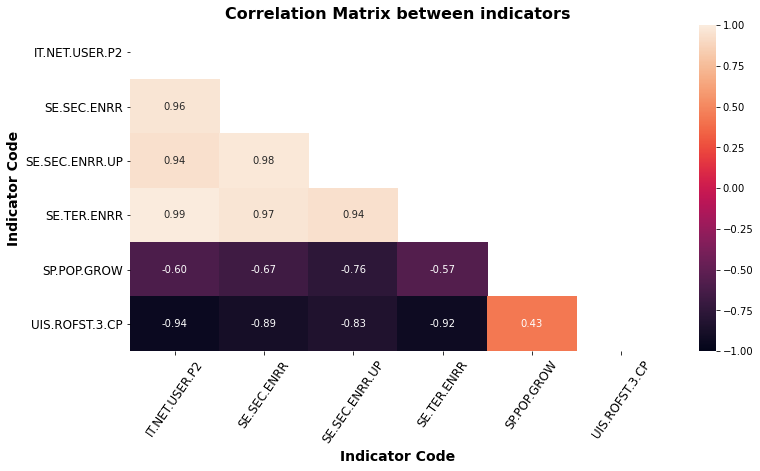

In [22]:
correlation_mat = indic_code.transpose().corr()

plt.figure(figsize=(12,6))

tricor = np.triu(correlation_mat)
res = sns.heatmap(correlation_mat, vmin=-1, vmax=1, center= None, annot = True, fmt='.2f', annot_kws={"size": 10}, mask=tricor)
plt.title('Correlation Matrix between indicators', fontsize = 16, weight = 'bold')
plt.xlabel ('Indicator Code', fontsize=14, weight = 'bold')
plt.ylabel ('Indicator Code', fontsize=14, weight = 'bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12, rotation=55)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()


__Interactions between continuous variables using seaborn pairplot__

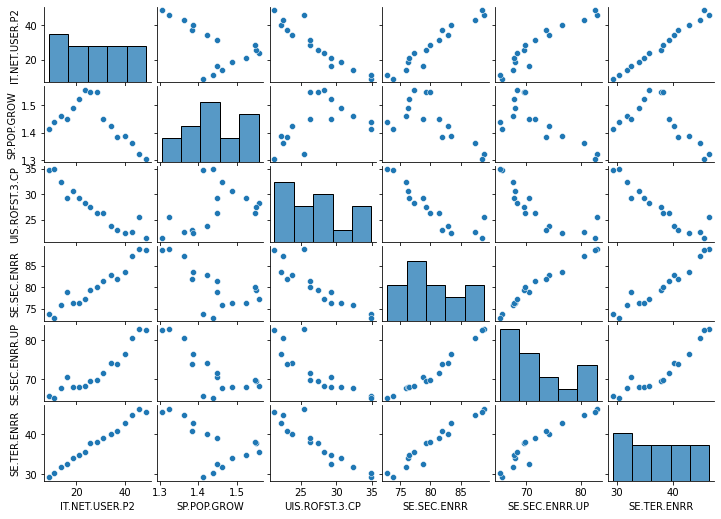

In [23]:
invert_code = indic_code.T

dispersion = invert_code[(Indicators)].loc[:'2015']

scatter = sns.pairplot(dispersion)
scatter.fig.set_size_inches(10,7)

We regroup the indicators by region and country to have an idea of the average value

In [24]:
regions_list = df_indic_combined.groupby(['Region', 'Indicator Code']).mean()
country_list = df_indic_combined.groupby(['Country Name', 'Indicator Code']).mean()
country_list.round(2)

2000   2001  2002   2003   2004   2005   2006  \
Country Name Indicator Code                                                  
Afghanistan  IT.NET.USER.P2   NaN   0.00  0.00   0.09   0.11   1.22   2.11   
             SE.SEC.ENRR      NaN  13.05   NaN  13.32  18.66  19.78  29.93   
             SE.SEC.ENRR.UP   NaN  12.22   NaN   7.98  11.44  12.11  16.97   
             SP.POP.GROW     3.49   4.25  4.72   4.82   4.47   3.87   3.23   
Albania      IT.NET.USER.P2  0.11   0.33  0.39   0.97   2.42   6.04   9.61   
...                           ...    ...   ...    ...    ...    ...    ...   
Yemen, Rep.  SP.POP.GROW     2.82   2.84  2.84   2.83   2.81   2.79   2.77   
Zambia       IT.NET.USER.P2  0.19   0.23  0.48   0.98   2.01   2.85   4.16   
             SP.POP.GROW     2.81   2.74  2.70   2.68   2.68   2.69   2.71   
Zimbabwe     IT.NET.USER.P2  0.40   0.80  1.10   1.80   2.10   2.40   2.40   
             SP.POP.GROW     1.30   1.17  1.08   1.06   1.13   1.26   1.41   

                              2007   2008   2009   2010   2011   2012   2013  \
Country Name Indicator Code                                                    
Afghanistan  IT.NET.USER.P2   1.90   1.84   3.55   4.00   5.00   5.45   5.90   
             SE.SEC.ENRR     30.08  40.22  46.73  53.25  54.62  56.68  56.69   
             SE.SEC.ENRR.UP  17.56  21.80  26.05  32.13  39.86  44.57  46.26   
             SP.POP.GROW      2.76   2.51   2.57   2.81   3.10   3.27   3.32   
Albania      IT.NET.USER.P2  15.04  23.86  41.20  45.00  49.00  54.66  57.20   
...                            ...    ...    ...    ...    ...    ...    ...   
Yemen, Rep.  SP.POP.GROW      2.75   2.74   2.73   2.71   2.70   2.68   2.64   
Zambia       IT.NET.USER.P2   4.87   5.55   6.31  10.00  11.50  13.47  15.40   
             SP.POP.GROW      2.73   2.76   2.82   2.88   2.95   3.01   3.04   
Zimbabwe     IT.NET.USER.P2   3.00   3.50   4.00   6.40   8.40  12.00  15.50   
             SP.POP.GROW      1.55   1.70   1.84   1.98   2.11   2.23   2.31   

                              2014   2015  
Country Name Indicator Code                
Afghanistan  IT.NET.USER.P2   7.00   8.26  
             SE.SEC.ENRR     55.66  55.64  
             SE.SEC.ENRR.UP  43.91  42.61  
             SP.POP.GROW      3.18   2.94  
Albania      IT.NET.USER.P2  60.10  63.25  
...                            ...    ...  
Yemen, Rep.  SP.POP.GROW      2.59   2.52  
Zambia       IT.NET.USER.P2  19.00  21.00  
             SP.POP.GROW      3.04   3.02  
Zimbabwe     IT.NET.USER.P2  16.36  22.74  
             SP.POP.GROW      2.34   2.35  

[959 rows x 16 columns]

__TRENDS OF THE DIFFERENT INDICATORS BY REGIONS & OVER TIME__

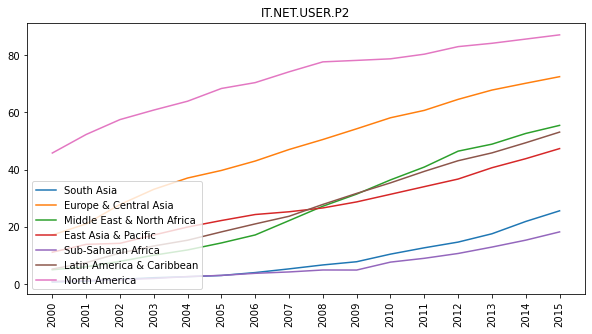

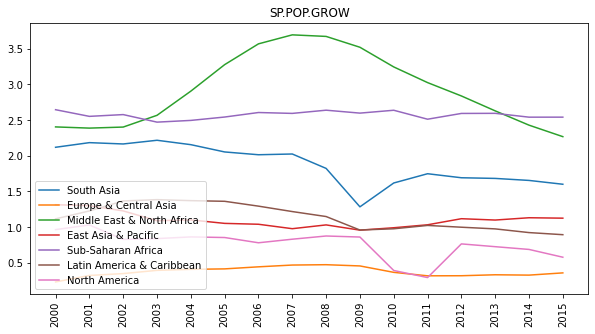

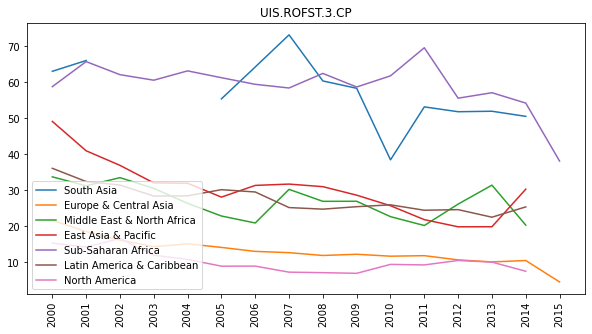

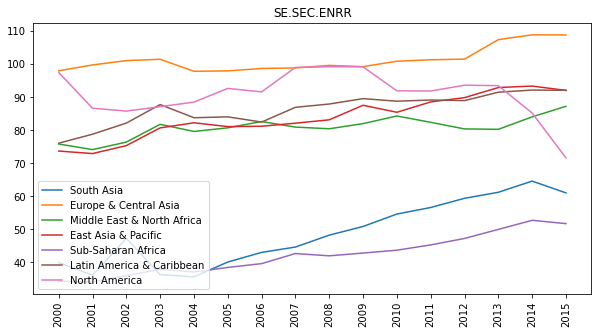

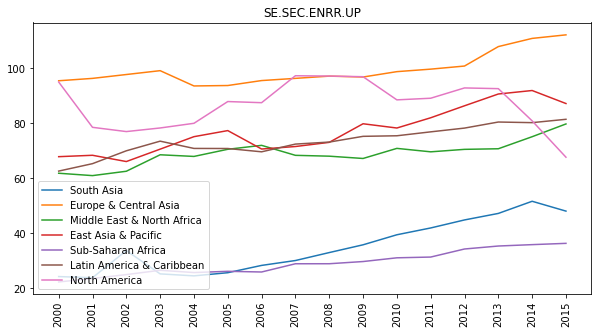

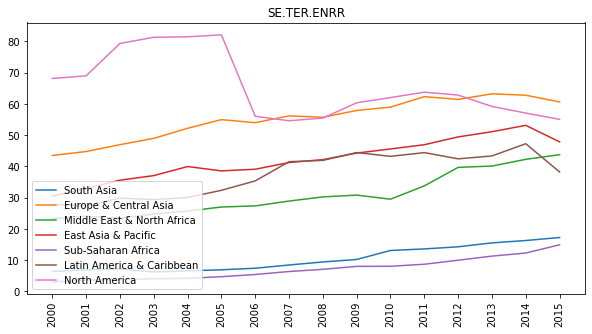

In [25]:
# Indicators = ['IT.NET.USER.P2', 'UIS.ROFST.3.CP', 'SP.POP.GROW', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']

for match in Indicators:
    
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes()
    plt.title(match)
    plt.xticks(rotation=90)
    
    for area in df_indic_combined['Region'].dropna().unique():
            ax.plot(regions_list.loc[area,match], label=area)
            plt.legend(loc='lower left')

__RANKING OF CANDIDATES REGIONS__

In [26]:
# We divide our dataframe into 3 subdataframes to get the last value, the mean and median of different indicators
# As the internet users curve keeps increasing since 2000, the last value seems more representative than an average

region_net = df_indic_combined[df_indic_combined["Indicator Code"] == 'IT.NET.USER.P2']
region_net = region_net.groupby(['Region', 'Indicator Code']).mean()
df_region_net = pd.DataFrame(region_net.iloc[:,-1]) 

# MEAN applied for the population growth rate due to the fluctuations

region_grow = df_indic_combined[df_indic_combined["Indicator Code"].isin(['SP.POP.GROW'])]
region_grow = region_grow.groupby(['Region', 'Indicator Code']).mean()
df_region_grow = pd.DataFrame(region_grow.mean(axis=1)) 

# Finally we apllied MEDIAN for enrolment rate curves et out-of-school drop rate

Li = ['SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP', 'UIS.ROFST.3.CP']
region_enrr = df_indic_combined[df_indic_combined["Indicator Code"].isin(Li)]
region_enrr = region_enrr.groupby(['Region', 'Indicator Code']).mean()
df_region_enrr = pd.DataFrame(region_enrr.median(axis=1))

# We re-create a main dataframe from the 3 resulting subdataframes

Av_region = df_region_grow.merge(df_region_enrr,how='outer',left_on=['Region','Indicator Code'],right_on=['Region', 'Indicator Code'])
Av_region = Av_region.merge(df_region_net,how='outer',left_on=['Region','Indicator Code'],right_on=['Region', 'Indicator Code'])
Av_region = Av_region.mean(axis=1)

df_Av1 = pd.DataFrame (Av_region)
df_Av1 = df_Av1.rename(columns={0: 'Values'})
df_Av1.reset_index(inplace=True)
df_pivot1 = df_Av1.pivot(index='Region', columns='Indicator Code', values='Values')

# Data normalization so that all indicators reads the same way
df_norm1 = (df_pivot1 - df_pivot1.min()) / (df_pivot1.max() - df_pivot1.min())

SCORE = df_norm1.mean(axis=1)
RATINGS = pd.DataFrame([SCORE.index,SCORE.values]).T
RATINGS.columns = ['Region', 'Score']
RATINGS['Score'] = RATINGS['Score'].astype(float, errors = 'raise')

# We merge our RATINGS dataframe with our indicators dataframe df_pivot1

result_region_bis = pd.merge(RATINGS, df_norm1, on="Region")
result_region_bis = result_region_bis.sort_values(by=['Score'], ascending=False)
result_region_bis.index = np.arange(1, len(result_region_bis)+1)
result_region_bis.round(3)


,Region,Score,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.GROW,UIS.ROFST.3.CP
1,North America,0.645,1.000,0.855,0.865,1.000,0.151,0.000
2,Europe & Central Asia,0.622,0.788,1.000,1.000,0.884,0.000,0.060
3,Middle East & North Africa,0.590,0.541,0.664,0.586,0.404,1.000,0.346
4,Latin America & Caribbean,0.527,0.506,0.785,0.648,0.595,0.300,0.327
5,East Asia & Pacific,0.525,0.423,0.696,0.691,0.628,0.284,0.427
6,Sub-Saharan Africa,0.310,0.000,0.000,0.000,0.000,0.861,1.000
7,South Asia,0.305,0.107,0.093,0.065,0.040,0.589,0.938


__CANDIDATES COUNTRIES__

In [32]:
# We divide our dataframe into 3 subdataframes to get the last value, the mean and median of different indicators

# Last value on Indicator 'IT.NET.USER.P2'
country_net = df_indic_combined[df_indic_combined["Indicator Code"] == 'IT.NET.USER.P2']
country_net = country_net.groupby(['Country Name', 'Indicator Code']).mean()
df_country_net = pd.DataFrame(country_net.iloc[:,-1:]) 

# Mean value on 'SP.POP.GROW' 
country_grow = df_indic_combined[df_indic_combined["Indicator Code"].isin(['SP.POP.GROW', 'UIS.ROFST.3.CP'])]
country_grow = country_grow.groupby(['Country Name', 'Indicator Code']).mean()
df_country_grow = pd.DataFrame(country_grow.mean(axis=1))

# Median value on the remaining indicators
Li1 = ['SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']
country_enrr = df_indic_combined[df_indic_combined["Indicator Code"].isin(Li1)]
country_enrr = country_enrr.groupby(['Country Name', 'Indicator Code']).mean()
df_country_enrr = pd.DataFrame(country_enrr.median(axis=1))

# Re-creation a dataframe from the 3 subdataframes

Average_country = df_country_net.merge(df_country_grow,how='outer',left_on=['Country Name','Indicator Code'],right_on=['Country Name', 'Indicator Code'])
Average_country = Average_country.merge(df_country_enrr,how='outer',left_on=['Country Name','Indicator Code'],right_on=['Country Name', 'Indicator Code'])
Average_country = Average_country.mean(axis=1)
df_Av2 = pd.DataFrame (Average_country)
df_Av2 = df_Av2.rename(columns={0: 'Values'})
df_Av2.reset_index(inplace=True)

# Creation of a pivot table to reorganize data
df_pivot2 = df_Av2.pivot(index='Country Name', columns='Indicator Code', values='Values')

# Data normalization
df_norm2 = (df_pivot2 - df_pivot2.min()) / (df_pivot2.max() - df_pivot2.min())

# Scoring attractivity - No weights on indicators 
SCORE = df_norm2.mean(axis=1)
RATINGS = pd.DataFrame([SCORE.index,SCORE.values]).T
RATINGS.columns = ['Country Name', 'Score']
RATINGS['Score'] = RATINGS['Score'].astype(float, errors = 'raise')

# We then merge the 2 dataframes 'RATINGS' & 'df_norm2'

result_country_bis = pd.merge(RATINGS, df_norm2, on="Country Name")

cap = len(result_country_bis.columns) *0.9 
result_country_bis = result_country_bis.dropna(thresh=cap, axis=0)
result_country_bis = result_country_bis.sort_values(by=['Score'], ascending=False)
result_country_bis.index = np.arange(1, len(result_country_bis)+1)
result_country_bis.head(15).round(3)


,Country Name,Score,IT.NET.USER.P2,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.GROW,UIS.ROFST.3.CP
1,Australia,0.671,0.858,1.000,1.000,0.789,0.262,0.114
2,Denmark,0.614,0.980,0.892,0.703,0.820,0.165,0.125
3,Iceland,0.604,0.999,0.775,0.637,0.776,0.230,0.207
4,Norway,0.595,0.984,0.806,0.689,0.800,0.215,0.072
5,Finland,0.589,0.878,0.796,0.659,0.985,0.161,0.059
6,Spain,0.564,0.798,0.842,0.671,0.758,0.209,0.106
7,"Korea, Rep.",0.559,0.911,0.677,0.503,1.000,0.179,0.083
8,Qatar,0.553,0.944,0.635,0.440,0.141,1.000,0.157
9,Netherlands,0.544,0.932,0.882,0.622,0.651,0.167,0.012
10,Bahrain,0.542,0.950,0.666,0.478,0.432,0.582,0.144


__INDICATORS TRENDS FOR THE TOP 10 COUNTRIES__

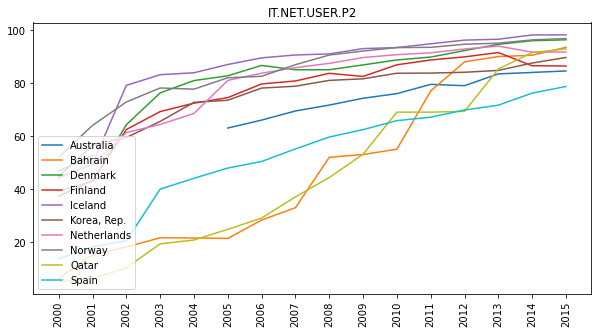

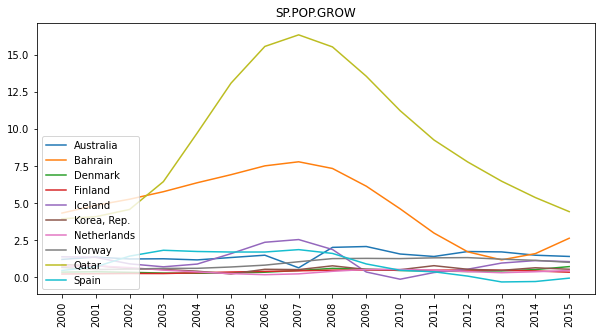

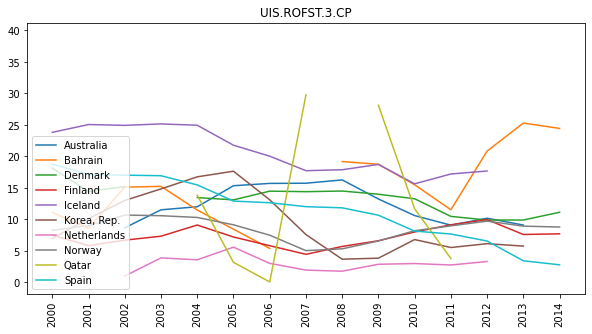

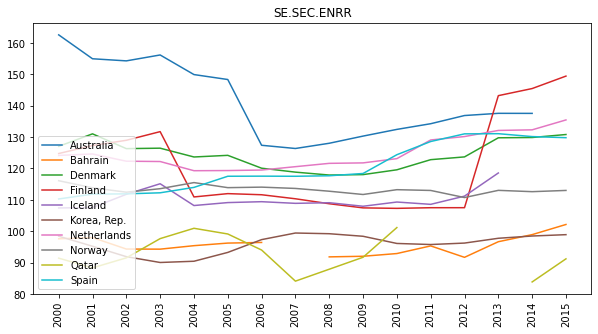

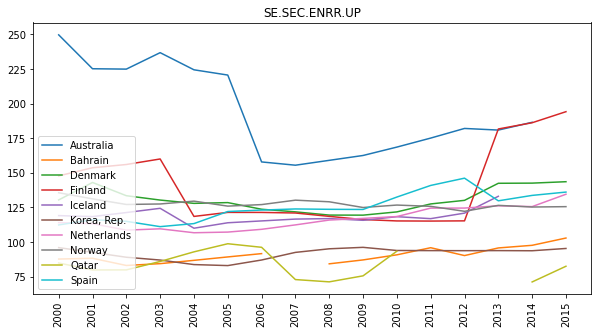

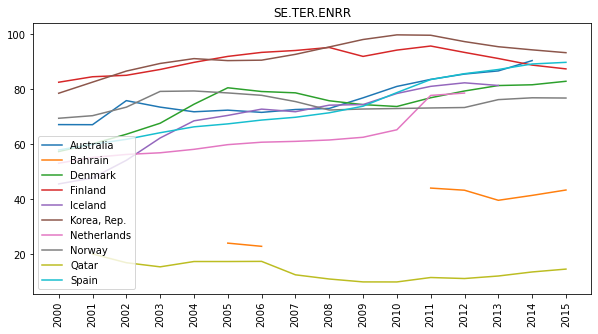

In [34]:
List = result_country_bis['Country Name'].head(10).tolist()
df0 = country_list[country_list.index.get_level_values('Country Name').isin(List)]
df1 = df_indic_combined[df_indic_combined['Country Name'].isin(List)]

for match in Indicators:
    
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes()
    plt.title(match)
    plt.xticks(rotation=90)
    
    for area in df1['Country Name'].dropna().unique():
            ax.plot(df0.loc[area,match], label=area)
            plt.legend(loc='lower left')

A list of potential candidate countries to expand our business has been defined based on our choice of indicators
.In order to access a maximum of students. The countries with the most potential amongst our 15 top candidates are (higher population countries):

AUSTRALIA-	SPAIN-	SOUTH KOREA	-	UNITED STATES-	UNITED KINGDOM

Population growth rate in these countries are low (which gives the opportunity to pursue education & careers especially for women) and indicators trends in school enrolment show good signs to keep growing.
Encouraging signs in the long term from countries in Latin America & East Asia/Pacific will have to be monitored.
We do not recommend expanding in countries from Sub-Saharan Africa and South Asia as indicators scorings are quite low despite improvements since 2010.
